In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib
from pylab import *
import matplotlib.pyplot as plt
import copy

In [33]:
df=pd.read_csv("Iris/Iris.csv",names=['sepal length','sepal width','petal length','petal width','class'])

In [34]:
X = df.drop(['class'],axis=1)
Y = df['class']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)
our = pd.DataFrame()

In [35]:
def euclidean_distance(x, y):   
    return np.sqrt(np.sum((x - y) ** 2))

In [36]:
def manhattan_distance(x, y):   
    return np.sum(abs(x - y))

In [37]:
def cosine_similarity(x, y):
    return np.dot(x, y) / (np.sqrt(np.dot(x, x)) * np.sqrt(np.dot(y, y)))

In [38]:
def prediction(attr,k):
    global our
    our = our.sort_values(by=[attr])
    sentosa = 0
    virginica = 0
    versicolor = 0
    i = 0
    for index,row in our.iterrows():
        if i >= k:
            break
        if row['b'] == "Iris-setosa":
            sentosa = sentosa + 1 
        elif row['b'] == "Iris-virginica":
            virginica = virginica + 1 
        elif row['b'] == "Iris-versicolor":
            versicolor = versicolor + 1 
        i = i + 1
    if sentosa >= virginica and sentosa >= versicolor:
        return "Iris-setosa"
    elif virginica >= sentosa and virginica >= versicolor:
        return "Iris-virginica"
    elif versicolor >= sentosa and versicolor >= virginica:
        return "Iris-versicolor"

In [39]:
Y_train = list(Y_train)
euclid = []
cosine = []
manhattan = []
k = 1
while k<11:
    predcosine = []
    predeuclid = []
    predmanhattan = []
    for index,row in X_test.iterrows():
        disteuclid = []
        distcosine = []
        distmanhattan = []
        for index1,row1 in X_train.iterrows():
            disteuclid.append(euclidean_distance(row,row1))
            distcosine.append(1-cosine_similarity(row,row1))
            distmanhattan.append(manhattan_distance(row,row1))

        our = pd.DataFrame(
        {'a': disteuclid,
         'b': Y_train,
         'c': distcosine,
         'd': distmanhattan
        })
        predeuclid.append(prediction('a',k))
        predcosine.append(prediction('c',k))
        predmanhattan.append(prediction('d',k))
    print("Euclid--->",accuracy_score(Y_test, predeuclid)*100)
    euclid.append(accuracy_score(Y_test, predeuclid)*100)
    print("Cosine--->",accuracy_score(Y_test, predcosine)*100)
    cosine.append(accuracy_score(Y_test, predcosine)*100)
    print("Manhattan--->",accuracy_score(Y_test, predmanhattan)*100)
    manhattan.append(accuracy_score(Y_test, predmanhattan)*100)
    k = k + 1

Euclid---> 96.29629629629629
Cosine---> 100.0
Manhattan---> 92.5925925925926
Euclid---> 96.29629629629629
Cosine---> 100.0
Manhattan---> 96.29629629629629
Euclid---> 96.29629629629629
Cosine---> 100.0
Manhattan---> 92.5925925925926
Euclid---> 96.29629629629629
Cosine---> 96.29629629629629
Manhattan---> 92.5925925925926
Euclid---> 96.29629629629629
Cosine---> 100.0
Manhattan---> 92.5925925925926
Euclid---> 96.29629629629629
Cosine---> 96.29629629629629
Manhattan---> 96.29629629629629
Euclid---> 100.0
Cosine---> 96.29629629629629
Manhattan---> 92.5925925925926
Euclid---> 100.0
Cosine---> 96.29629629629629
Manhattan---> 100.0
Euclid---> 100.0
Cosine---> 96.29629629629629
Manhattan---> 100.0
Euclid---> 100.0
Cosine---> 96.29629629629629
Manhattan---> 96.29629629629629


Text(0.5, 1.0, 'K-value vs Accuracy')

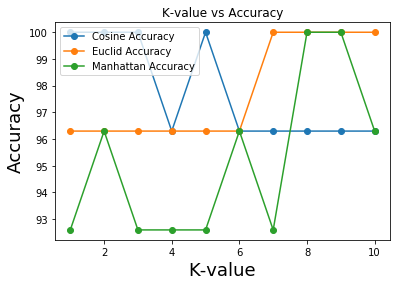

In [40]:
fig, ax = plt.subplots()
x_axis = [i for i in range(1,11,1)]
ax.plot(x_axis, cosine, label="Cosine Accuracy",marker='o')
ax.plot(x_axis, euclid, label="Euclid Accuracy",marker='o')
ax.plot(x_axis, manhattan, label="Manhattan Accuracy",marker='o')
ax.legend(loc=2)
ax.set_xlabel("K-value", fontsize=18)
ax.set_ylabel("Accuracy", fontsize=18)
ax.set_title('K-value vs Accuracy')

### k should be greater than zero.
### k <= sqrt(n) where n is the number of training data.
### Value of k should be odd.
### Value of k should be as large as possible.
### Performance increases when value of k increases because it predicts value by looking more examples.
### But after some point performance decreases when value of k increases.
### Large k = simple model = underfit = low variance & high bias
### Small k = complex model = overfit = high variance & low bias

In [41]:
neigh = KNeighborsClassifier()
neigh.fit(X_train, Y_train) 
y_pred = neigh.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))
print(accuracy_score(Y_test, y_pred)*100)

[[11  0  0]
 [ 0  6  1]
 [ 0  0  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.86      0.92         7
 Iris-virginica       0.90      1.00      0.95         9

      micro avg       0.96      0.96      0.96        27
      macro avg       0.97      0.95      0.96        27
   weighted avg       0.97      0.96      0.96        27

96.29629629629629
